# ANÁLISIS DE VENTAS

Sesiones utilizadas:
- Separación, validación y evaluación para algoritmos de ML (2 - Listo)

Por considerar incluir:
- Problemas de regresión (4)
- Redes Neuronales Artificiales (6)

Observaciones
- Hacer las respectivas pruebas conforme vaya avanzando el curso y adaptar el contenido de este cuaderno al archivo MLUtilities
- Si da tiempo, mover a este notebook lo de redes Neuronales

# IMPORTACIONES

In [2]:
# Importamos librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt                                # Librería utilizada para los gráficos
import MLUtilities

from sklearn.model_selection import train_test_split                # Librería para hacer la separación del dataframe
from sklearn.model_selection import KFold                           # Librería empleada en la validación cruzada
from sklearn.metrics import confusion_matrix                        # Librería requerida para la matriz de confusión

In [3]:
# Importamos el dataset
df_online_sales = pd.read_csv('dataset/online_sales_analize_full.csv', index_col=0)
df_online_sales.head(15)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,CustomerSince,PlaceName,County,City,State,zip,Region,Discount_Percent,lat,lng
0,2,2020-10-01,12,574772,47773,21,89.9,1798.0,0.00000,1798.00000,...,2006-08-22,14759,1006,14759,37,73571,3,0.000000,34.9325,-99.92476
1,2,2020-10-01,12,574774,12364,11,19.0,190.0,0.00000,190.00000,...,2006-08-22,14759,1006,14759,37,73571,3,0.000000,34.9325,-99.92476
2,4,2020-10-01,4,574777,47694,9,149.9,1199.2,0.00000,1199.20000,...,2006-08-22,14759,1006,14759,37,73571,3,0.000000,34.9325,-99.92476
3,4,2020-10-01,4,574779,47772,9,79.9,639.2,0.00000,639.20000,...,2006-08-22,14759,1006,14759,37,73571,3,0.000000,34.9325,-99.92476
4,12669,2020-11-13,12,595185,31021,2,99.9,99.9,0.00000,99.90000,...,2006-08-22,14759,1006,14759,37,73571,3,0.000000,34.9325,-99.92476
5,12669,2020-11-13,12,595186,27274,2,39.9,39.9,0.00000,39.90000,...,2006-08-22,14759,1006,14759,37,73571,3,0.000000,34.9325,-99.92476
6,12672,2020-11-13,6,595192,21354,2,47.6,47.6,0.00000,47.60000,...,2006-08-22,14759,1006,14759,37,73571,3,0.000000,34.9325,-99.92476
7,1,2020-10-01,1,574769,12499,2,49.0,49.0,0.00000,49.00000,...,1981-02-04,5489,272,5489,10,32042,3,0.000000,NaN,NaN
8,1,2020-10-01,1,574770,47760,2,135.0,135.0,0.00000,135.00000,...,1981-02-04,5489,272,5489,10,32042,3,0.000000,NaN,NaN
9,1,2020-10-01,1,574771,12545,2,549.9,549.9,0.00000,549.90000,...,1981-02-04,5489,272,5489,10,32042,3,0.000000,NaN,NaN


# DESARROLLO DE CÓDIGO

#### Preparativos

In [4]:
# verificamos el nombre de todas las columnas
df_online_sales.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Gender', 'age', 'CustomerSince', 'PlaceName', 'County', 'City',
       'State', 'zip', 'Region', 'Discount_Percent', 'lat', 'lng'],
      dtype='object')

In [5]:
# OBTENCIÓN DEL DATAFRAME DE ORDER_DATE  - TOTAL

df_date_total = df_online_sales[['order_date', 'total']].reset_index(drop=True)         # Extrael dos columnas de un dataframe
df_date_total.head()                                                                    # Revisamos el dataframe

,order_date,total
0,2020-10-01,1798.0
1,2020-10-01,190.0
2,2020-10-01,1199.2
3,2020-10-01,639.2
4,2020-11-13,99.9


In [6]:
df_date_total.shape

(286392, 2)

In [7]:
# QUITAMOS VALORES ATIPICOS (5%)

quitar=0.05

totales = df_date_total['total']

percentil_025 = totales.quantile(0.025)
percentil_975 = totales.quantile(0.975)

# Declaramos los filtros
filtro_025 = df_date_total['total'] > percentil_025
filtro_975 = df_date_total['total'] < percentil_975

# Obtenemos el dataframe filtrado (01% - 99%) así como su numero de filas
df_date_total_95 = df_date_total[filtro_025 & filtro_975]
dimensiones_95 = df_date_total_95.shape[0]
print(dimensiones_95)


259825


In [9]:
data_filtrado = df_date_total_95.shape
data_entero = df_date_total.shape

frows, fcols = data_filtrado
erows, eclos = data_entero
pr_rows = (frows/erows)*100

print(f'Dataframe original:{frows}')
print(f'Dataframe filtrado:{erows}')
print(f'Rango conservad0: {pr_rows}%')

Dataframe original:259825
Dataframe filtrado:286392
Rango conservad0: 90.72355373055113%


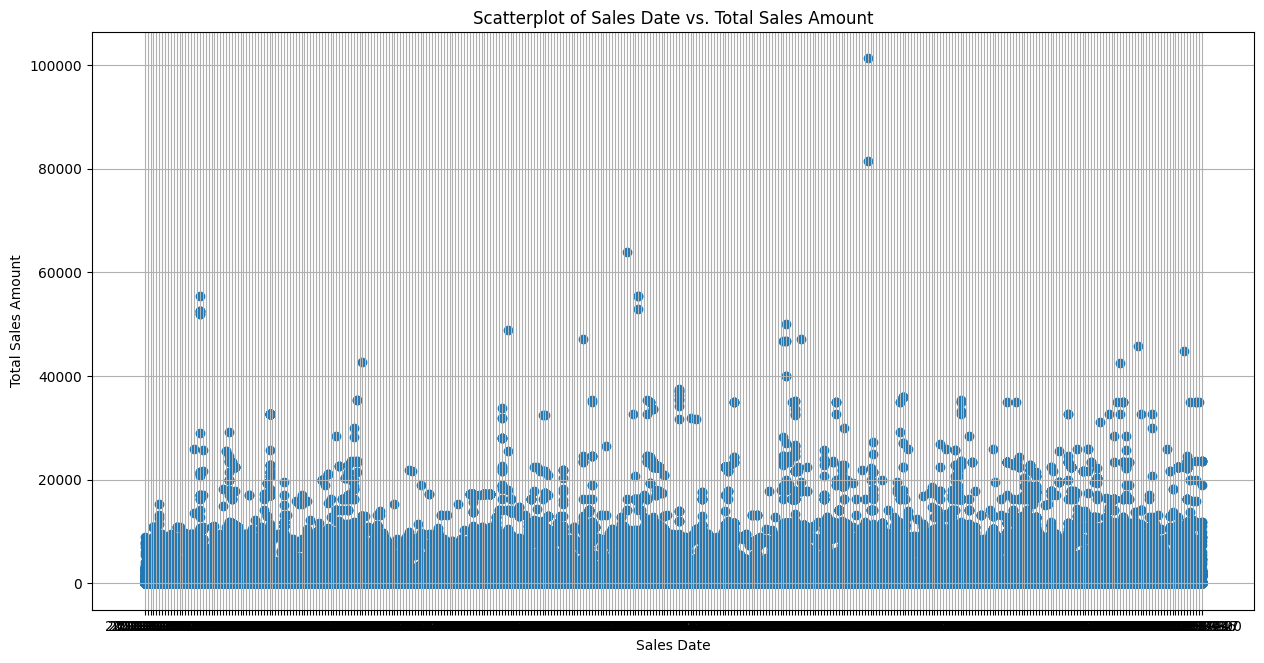

In [10]:
# Dataframe original
eje_x = 'order_date'
eje_y = 'total'

plt.figure(figsize=(15, 7.5))
plt.scatter(df_online_sales[eje_x], df_online_sales[eje_y])
plt.xlabel('Sales Date')
plt.ylabel('Total Sales Amount')
plt.title('Scatterplot of Sales Date vs. Total Sales Amount')
plt.grid(True)
plt.show()

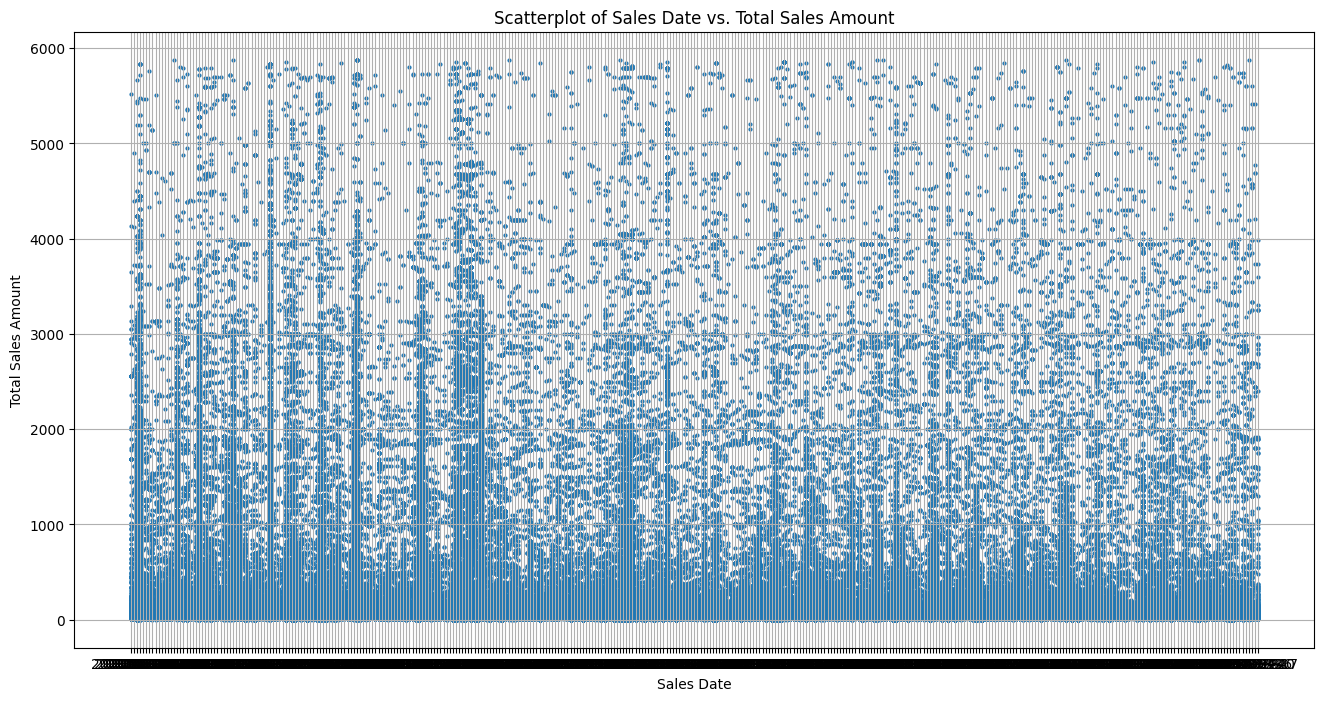

In [11]:
# Dataframe filtrado
eje_x = 'order_date'
eje_y = 'total'

plt.figure(figsize=(16, 8))
plt.scatter(df_date_total_95[eje_x], df_date_total_95[eje_y], s=4)
plt.xlabel('Sales Date')
plt.ylabel('Total Sales Amount')
plt.title('Scatterplot of Sales Date vs. Total Sales Amount')
plt.grid(True)
plt.show()

# Desarrollo

### SEPARACIÓN, VALIDACIÓN y EVALUACIÓN PARA ALGORITMOS DE ML

In [ ]:
# SEPARACIÓN DE LOS DATOS

# Definimos la función de partición
def particionar(entradas, salidas, porcentaje_entrenamiento, porcentaje_validacion, porcentaje_prueba):
    temp_size = porcentaje_validacion + porcentaje_prueba
    print(temp_size)
    x_train, x_temp, y_train, y_temp = train_test_split(entradas, salidas, test_size =temp_size)
    if(porcentaje_validacion > 0):
        test_size = porcentaje_prueba/temp_size
        x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = test_size)
    else:
        return [x_train, None, x_temp, y_train, None, y_temp]
    return [x_train, x_val, x_test, y_train, y_val, y_test]

print('Función definida')

In [ ]:
# Hacemos un llamado de ejemplo de la función e imprimimos los resultados

# Definimos variables
e_x = df_date_total_95[eje_x]
e_y = df_date_total_95[eje_y]
size_train = 0.60
size_valida = 0.10
size_test = 0.30


# Llamamos a la función definida y a los datos para generar las particiones 
[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(e_x, e_y, size_train, size_valida, size_test)

# Imprimimos el tamaño de las particiones.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

### VALIDACIONES

Definición de variables

In [ ]:
data = y_train.to_numpy()
K = 5                                           # Número de muestras            # de la validación cruzada
# klo = data.shape[0]                           # Número de muestras de la validación LEAVE-ONE-OUT CROSS VALIDATION
random_seed_1 =   50                              # semilla aleatoria
random_seed_2 =   45                              # semilla aleatoria
aleatorio = True

Validación cruzada

In [ ]:
kfold = KFold(n_splits= K, shuffle=aleatorio, random_state=random_seed_1)
ciclo = 1
for indices_train, indices_test in kfold.split(data):
    print("Ciclo: "+str(ciclo))
    print("\t Datos para entrenamiento:"+str(data[indices_train]))
    print("\t Datos para prueba:"+str(data[indices_test]))
    ciclo+=1
    
# Pendiente reto 2

Leave-one-out Cross Validation

In [ ]:
kfold = KFold(n_splits=K, shuffle=aleatorio, random_state=random_seed_2)
ciclo = 1
for indices_train, indices_test in kfold.split(data):
    print("Ciclo: "+str(ciclo))
    print("\t Datos para entrenamiento:"+str(data[indices_train]))
    print("\t Datos para prueba:"+str(data[indices_test]))
    ciclo+=1
    
# pendiente Reto 3

#### MATRIZ DE CONFUSIÓN - Hecho hasta el archivo 3

In [ ]:
# MATRIZ DE CONFUSIÓN

# Definición de datos esperados y datos predichos
y_esperados = np.array([1,1,1,1,0,0,0,0])
y_predichos = np.array([1,0,1,0,1,0,0,0])

# Determinación de la matriz
resultado = confusion_matrix(y_esperados, y_predichos)
print(resultado)

# Determinación de TN, FP, FN y TP
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

In [ ]:
# MÉTRICAS DE MACHINE LEARNING

# Definición de métricas

def calcularAccuracy(TP, TN, FP, FN):                       # Precisión o Accurancy
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy

def calcularSensibilidad(TP, TN, FP, FN):                   # Sensibilidad
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def calcularEspecificidad(TP, TN, FP, FN):                  # Especificidad
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

# Cálculo e impresión de los resultados.

# Llamamos a las funciones y hacemos los cálculos
acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)

# Imprimimos los resultados
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")